In [2]:
# Add parent directory to path to import SWRExplorer
import os
import sys
try:
    # This works in script context
    parent_dir = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
except NameError:
    # This works in notebook context
    parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

# Import all necessary components
from swr_spike_behavior_visualizer import (
    SWRSpikeAnalyzer,
    abi_visual_behavior_units_session_search,
    find_best_spiking_coupling
)


/home/acampbell/miniconda3/envs/allensdk_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:

# Define paths and parameters
CACHE_DIR = "/space/scratch/allen_visbehave_data"
SWR_INPUT_DIR = "/space/scratch/SWR_final_pipeline/osf_campbellmurphy2025_v2_final"
OUTPUT_DIR = "/home/acampbell/NeuropixelsLFPOnRamp/Figures_and_Technical_Validation/Relating_SWR_to_other_data/Results"
TARGET_REGIONS = ['SUB']
MIN_UNITS_PER_REGION = 100
WINDOW_SIZE = 0.1

# Run the analysis
summary_df = find_best_spiking_coupling(
    cache_dir=CACHE_DIR,
    swr_input_dir=SWR_INPUT_DIR,
    output_dir=OUTPUT_DIR,
    target_regions=TARGET_REGIONS,
    min_units_per_region=MIN_UNITS_PER_REGION,
    window_size=WINDOW_SIZE,
    save_intermediate=True
)


Initial data shapes:
Units table shape: (319013, 35)

Number of sessions with units in target regions: 102

Testing with session 1047969464 (SUB units: 72)
Found 4 probes for session 1047969464
Found 17 events for probe 1048089914
Found 28 events for probe 1048089915
Found 15 events for probe 1048089916
Found 1 events for probe 1048089911
Total events across all probes: 61


/home/acampbell/miniconda3/envs/allensdk_env/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.7.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)
/home/acampbell/miniconda3/envs/allensdk_env/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Saved results for SUB to /home/acampbell/NeuropixelsLFPOnRamp/Figures_and_Technical_Validation/Relating_SWR_to_other_data/Results/swr_spike_analysis_SUB_20250613_183741.csv

Saved summary results to /home/acampbell/NeuropixelsLFPOnRamp/Figures_and_Technical_Validation/Relating_SWR_to_other_data/Results/swr_spike_analysis_summary_20250613_183741.csv


In [8]:
summary_df.head(5)

,session_id,region,direction,corrected_significant_units,uncorrected_significant_units,total_units
0,1047969464,SUB,increase,"{'pre_vs_post': 0.0, 'before_vs_after': 0.0, '...","{'pre_vs_post': 2.0, 'before_vs_after': 0.0, '...",72.0
1,1047969464,SUB,decrease,"{'pre_vs_post': 0.0, 'before_vs_after': 0.0, '...","{'pre_vs_post': 3.0, 'before_vs_after': 1.0, '...",72.0
2,1047969464,SUB,any,"{'pre_vs_post': 0.0, 'before_vs_after': 0.0, '...","{'pre_vs_post': 5.0, 'before_vs_after': 1.0, '...",72.0


In [1]:
from swr_spike_behavior_visualizer import (
    SWRSpikeAnalyzer, find_best_spiking_coupling, suggest_best_events, spikes_around_event_plot
)

# Set your parameters
CACHE_DIR = "/space/scratch/allen_visbehave_data"
SWR_INPUT_DIR = "/space/scratch/SWR_final_pipeline/osf_campbellmurphy2025_v2_final"
OUTPUT_DIR = "/home/acampbell/NeuropixelsLFPOnRamp/Figures_and_Technical_Validation/Relating_SWR_to_other_data/Results"
TARGET_REGIONS = ['RSC', 'SUB']
MIN_UNITS_PER_REGION = 100
WINDOW_SIZE = 0.1

# Initialize analyzer
analyzer = SWRSpikeAnalyzer(
    cache_dir=CACHE_DIR,
    swr_input_dir=SWR_INPUT_DIR
)

# Pick a session and region
session_id = 1047969464
region = 'SUB'

# Suggest best events
top_events = suggest_best_events(analyzer, session_id, region, k=2)
print("Top events:", top_events)


/home/acampbell/miniconda3/envs/allensdk_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/acampbell/miniconda3/envs/allensdk_env/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.7.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)
/home/acampbell/miniconda3/envs/allensdk_env/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs w

Top events: [('1048089914', 1379, 0), ('1048089914', 2130, 0)]


/home/acampbell/miniconda3/envs/allensdk_env/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/home/acampbell/miniconda3/envs/allensdk_env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/acampbell/miniconda3/envs/allensdk_env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


/home/acampbell/miniconda3/envs/allensdk_env/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.7.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)
/home/acampbell/miniconda3/envs/allensdk_env/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/home/acampbell/miniconda3/envs/allensdk_env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divi

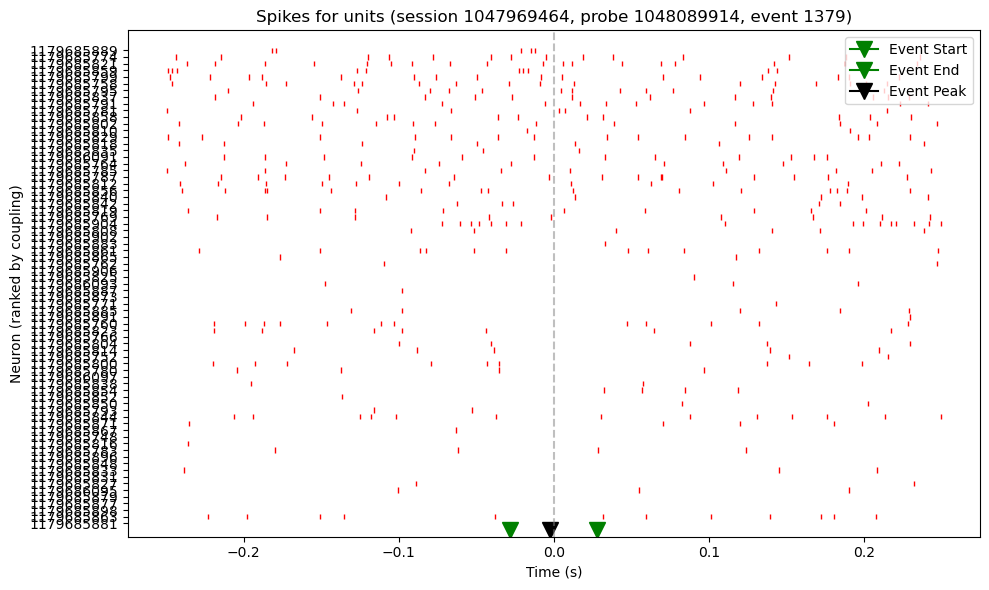

In [2]:

# Plot the second top event, showing all units and their IDs, with a wider window
if len(top_events) > 1:
    probe_id, event_idx, n_sig = top_events[0]
    fig = spikes_around_event_plot(
        analyzer, session_id, probe_id, event_idx, region, window=0.5,
        show_all_units=True, show_unit_ids=True, show_yticks=True
    )
    fig.show()